In [34]:
import tensorflow as tf #basic ml frame work used for CNN
from tensorflow.keras import layers, models #for building CNN
from tensorflow.keras.preprocessing.image import ImageDataGenerator # for loading/argumenting images
import matplotlib.pyplot as plt
import numpy as np







In [35]:

base_dir='Dataset'
img_size=(128,128)
batch_size=8

In [36]:
import os
print(os.listdir("Dataset"))

['infected', 'healthy']


In [37]:
!rm -rf Dataset/.ipynb_checkpoints


In [20]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    rotation_range=25,
    zoom_range=0.2
)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=8,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=8,
    class_mode='binary',
    subset='validation'
)


Found 16 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


In [38]:
model=models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 363ms/step - accuracy: 0.5000 - loss: 0.6709 - val_accuracy: 0.5000 - val_loss: 0.6776
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 329ms/step - accuracy: 0.5000 - loss: 0.6746 - val_accuracy: 0.7500 - val_loss: 0.6531
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 286ms/step - accuracy: 0.4583 - loss: 0.6813 - val_accuracy: 0.7500 - val_loss: 0.6895
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 279ms/step - accuracy: 0.6667 - loss: 0.6790 - val_accuracy: 0.5000 - val_loss: 0.6936
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 286ms/step - accuracy: 0.5000 - loss: 0.6588 - val_accuracy: 0.5000 - val_loss: 0.6397
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 287ms/step - accuracy: 0.5417 - loss: 0.6797 - val_accuracy: 0.7500 - val_loss: 0.7248
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 285ms/step - accuracy: 0.7500 - loss: 0.6384 - val_accuracy: 0.7500 - val_loss: 0.6629
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 288ms/step - accuracy: 0.7083 - loss: 0.6267 - val_accuracy: 0.5000 - val_loss:

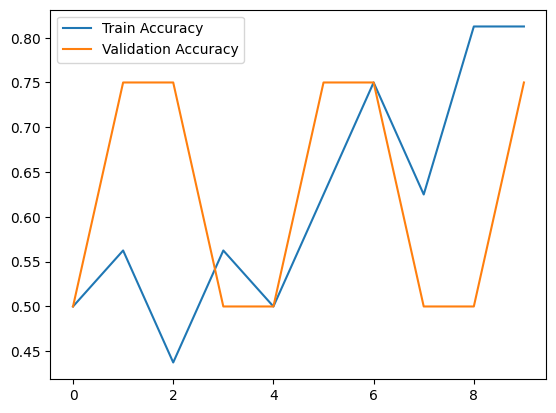

In [44]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [45]:
from tensorflow.keras.preprocessing import image
img_path='test_img.jpg'

img=image.load_img(img_path,target_size=img_size)
x=image.img_to_array(img)/255.0
x=np.expand_dims(x,axis=0)

In [46]:
pred=model.predict(x)[0][0]
label="infected" if pred >=0.5 else "healthy"
confidence=pred if pred >=0.5 else 1-pred

print(f"Predicted:{label} Confidence: {confidence}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted:infected Confidence: 0.7830461263656616
